In [11]:
import pandas as pd
import math

In [33]:
movements = pd.read_csv("../data/data_movements_demo.csv")
records = pd.read_csv("../data/data_trials_demo.csv")

<Axes: xlabel='x', ylabel='y'>

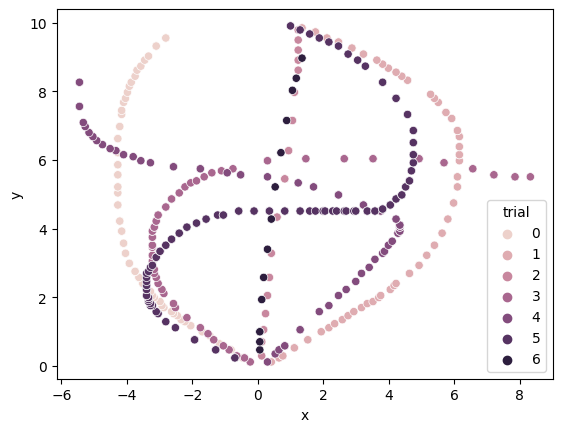

In [36]:
sns.scatterplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial')

In [9]:
movements

,Unnamed: 0,trial,state,sample,time,x,y
0,0,0,search_ring,0,0.007505,0.624785,3.673841
1,1,0,search_ring,1,0.016552,0.624762,3.673838
2,2,0,search_ring,2,0.029583,0.624689,3.673830
3,3,0,search_ring,3,0.044547,0.624640,3.673831
4,4,0,search_ring,4,0.062524,0.624626,3.673821
...,...,...,...,...,...,...,...
74678,203,299,iti,75144,1252.457201,0.019315,3.267683
74679,204,299,iti,75145,1252.473226,0.012895,3.160043
74680,205,299,iti,75146,1252.490209,0.007945,3.059923
74681,206,299,iti,75147,1252.508209,0.003570,2.967618


In [17]:
dist = lambda x1, y1, x2, y2: math.sqrt((y2 - y1)**2 + (x2 - x1)**2)

dx = [0]
dt = [0]
for i in range(1, len(movements)):
    prev_row = movements.iloc[i - 1]
    cur_row = movements.iloc[i]
    dx.append(dist(prev_row.x, prev_row.y, cur_row.x, cur_row.y))
    dt.append(cur_row.time - prev_row.time)

movements['dx'] = dx
movements['dt'] = dt

In [18]:
movements['vel'] = movements.dx / movements.dt

In [27]:
reach = movements.loc[movements.state == 'reach']
max_vel = reach[['trial', 'dx', 'dt', 'vel']].groupby('trial').agg({'vel': 'max'}).reset_index().rename(columns={'vel': 'max_vel'})

joined = pd.merge(reach, max_vel, on='trial', how='left')
mx_points = joined.loc[joined.vel == joined.max_vel]
first_points = reach.groupby('trial').agg(lambda x: list(x)[0]).reset_index()

In [28]:
mx_points

,Unnamed: 0,trial,state,sample,time,x,y,dx,dt,vel,max_vel
6,285,0,reach,285,4.745604,1.169285,8.815641,2.004157,0.016961,118.166146,118.166146
13,268,1,reach,677,11.277772,0.040522,7.252820,1.888883,0.016014,117.950526,117.950526
21,263,2,reach,1064,17.728861,-0.002924,7.004563,1.732091,0.015973,108.441363,108.441363
30,208,3,reach,1397,23.278023,0.080056,8.314590,1.610882,0.016069,100.247154,100.247154
40,175,4,reach,1697,28.279041,-0.115095,8.395565,1.662975,0.017003,97.805959,97.805959
...,...,...,...,...,...,...,...,...,...,...,...
3116,95,295,reach,74125,1235.473085,0.505232,7.320088,1.324595,0.015979,82.898610,82.898610
3127,110,296,reach,74360,1239.390172,-0.114514,8.496610,1.449197,0.014995,96.642765,96.642765
3138,120,297,reach,74605,1243.473260,0.079262,9.640314,1.572367,0.016021,98.142880,98.142880
3149,89,298,reach,74817,1247.007298,0.529320,9.755618,1.279016,0.015864,80.621249,80.621249


In [29]:
first_points

,trial,Unnamed: 0,state,sample,time,x,y,dx,dt,vel
0,0,279,reach,279,4.645016,-0.099556,0.539786,0.359988,0.016284,22.106588
1,1,262,reach,671,11.179157,-0.082254,0.318731,0.200908,0.017304,11.610486
2,2,257,reach,1058,17.629316,-0.088537,0.396245,0.264439,0.016320,16.203666
3,3,201,reach,1390,23.162399,-0.126751,0.535083,0.321425,0.017316,18.562761
4,4,167,reach,1689,28.145474,-0.080901,0.312185,0.182067,0.015328,11.877998
...,...,...,...,...,...,...,...,...,...,...
295,295,87,reach,74117,1235.340485,0.016486,0.342970,0.205434,0.017131,11.991876
296,296,101,reach,74351,1239.240607,-0.026675,0.294600,0.210085,0.017161,12.241991
297,297,111,reach,74596,1243.324699,0.055290,0.276151,0.228585,0.016220,14.092496
298,298,79,reach,74807,1246.840744,0.023845,0.493688,0.265265,0.016147,16.427829


<Axes: xlabel='x', ylabel='y'>

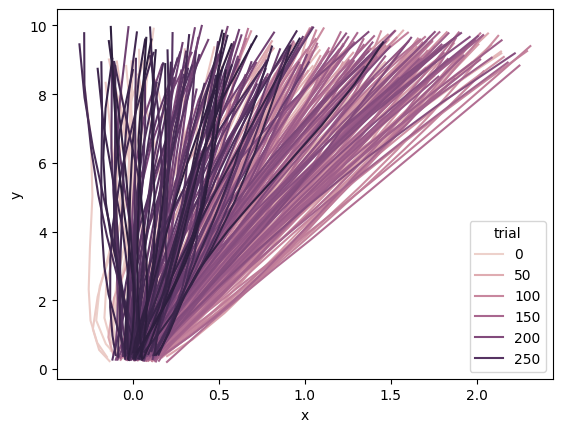

In [31]:
import seaborn as sns
sns.lineplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial', sort = False)